# **Deep Dive into Healthcare Domain: An Exploratory Data Analysis (EDA) Approach**

## **Introduction**

Heart disease remains one of the leading causes of mortality worldwide, encompassing a range of conditions that affect the heart's structure and function. These conditions include coronary artery disease, heart failure, arrhythmias, and more. Understanding the factors that contribute to heart disease and monitoring key health metrics, such as heart rate, is essential for early detection, prevention, and effective management of these conditions.

Exploratory Data Analysis (EDA) plays a crucial role in the healthcare domain, particularly in the analysis of heart disease and heart rate data. EDA helps in uncovering patterns, trends, and relationships within the data, facilitating better clinical insights and decision-making. This project aims to perform an in-depth EDA on a heart disease dataset to identify significant patterns and correlations, which can aid in improving patient outcomes and informing future research.

## **Objectives**

1.Gain a comprehensive understanding of the dataset's structure and distribution.

2.Identify and address missing values and outliers.

3.Visualize key patterns, trends, and relationships.

4.Generate hypotheses for further analysis and modeling.

### Import required libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
sns.__version__

'0.13.2'

In [3]:
%matplotlib inline
sns.set(style="whitegrid")

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Import dataset 

In [5]:
df = pd.read_csv(r'C:\Users\91939\Desktop\AI&DS\17thAug\17th - Test, Seaborn, Eda Practicle\17th - Test, Seaborn, Eda Practicle\EDA- HEALTHCARE DOMAIN\heart.csv')

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
print('The shape of the dataset : ', df.shape) # returns the shape of the dataset

The shape of the dataset :  (303, 14)


In [8]:
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
df.info() #returns the summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Dataset description <a class="anchor" id="6.4"></a>

- The dataset contains several columns which are as follows -

  - age : age in years
  - sex : (1 = male; 0 = female)
  - cp : chest pain type
  - trestbps : resting blood pressure (in mm Hg on admission to the hospital)
  - chol : serum cholestoral in mg/dl
  - fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  - restecg : resting electrocardiographic results
  - thalach : maximum heart rate achieved
  - exang : exercise induced angina (1 = yes; 0 = no)
  - oldpeak : ST depression induced by exercise relative to rest
  - slope : the slope of the peak exercise ST segment
  - ca : number of major vessels (0-3) colored by flourosopy
  - thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
  - target : presence or absence of heart disease 1 or 0

In [11]:
df.dtypes # returns the datatypes of all the attributes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Important points about dataset <a class="anchor" id="6.6"></a>


- `sex` is a character variable. Its data type should be object. But it is encoded as (1 = male; 0 = female). So, its data type is given as int64.

- Same is the case with several other variables - `fbs`, `exang` and `target`.

- `fbs (fasting blood sugar)` should be a character variable as it contains only 0 and 1 as values (1 = true; 0 = false). As it contains only 0 and 1 as values, so its data type is given as int64.

- `exang (exercise induced angina)` should also be a character variable as it contains only 0 and 1 as values (1 = yes; 0 = no). It also contains only 0 and 1 as values, so its data type is given as int64.

- `target` should also be a character variable. But, it also contains 0 and 1 as values. So, its data type is given as int64.

### Statistical properties of dataset

In [12]:
# statistical properties of dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Important points to note


- The above command `df.describe()` helps us to view the statistical properties of numerical variables. It excludes character variables.

- If we want to view the statistical properties of character variables, we should run the following command -

     `df.describe(include=['object'])`
     
- If we want to view the statistical properties of all the variables, we should run the following command -

     `df.describe(include='all')`      

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Univariate analysis

#### Analysis of `target` feature variable <a class="anchor" id="7.1"></a>


- Our feature variable of interest is `target`.

- It refers to the presence of heart disease in the patient.

- It is integer valued as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).

- So, in this section, I will analyze the `target` variable. 


In [14]:
#checks no of unique values
df['target'].nunique() #checks 

2

In [15]:
#checks the unique values
df['target'].unique()

array([1, 0], dtype=int64)

In [16]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

#### Comment

- `1` stands for presence of heart disease. So, there are 165 patients suffering from heart disease.

- Similarly, `0` stands for absence of heart disease. So, there are 138 patients who do not have any heart disease.

- We can visualize this information below.

### Visualize frequency distribution of `target` variable

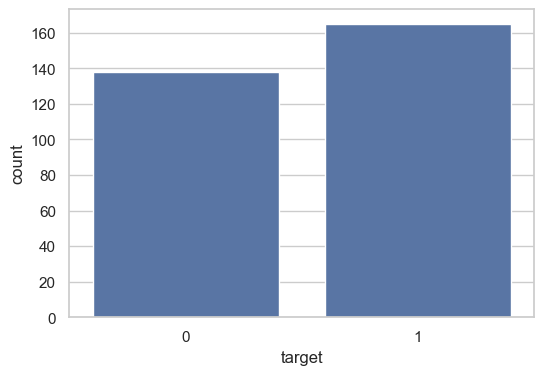

In [17]:
f, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x="target", data=df)
plt.show()

#### Interpretation


- The above plot confirms the findings that -

   - There are 165 patients suffering from heart disease, and 
   
   - There are 138 patients who do not have any heart disease.

### Frequency distribution of `target` variable wrt `sex`

In [18]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

#### Comment


- `sex` variable contains two integer values 1 and 0 : (1 = male; 0 = female).

- `target` variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

-  So, out of 96 females - 72 have heart disease and 24 do not have heart disease.

- Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

- We can visualize this information below.

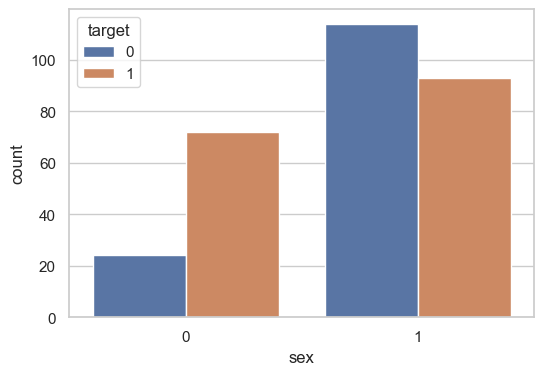

In [19]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="sex",hue='target', data=df)
plt.show()

#### Interpretation

- We can see that the values of `target` variable are plotted wrt `sex` : (1 = male; 0 = female).

- `target` variable also contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- The above plot confirms our findings that -

    - Out of 96 females - 72 have heart disease and 24 do not have heart disease.

    - Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

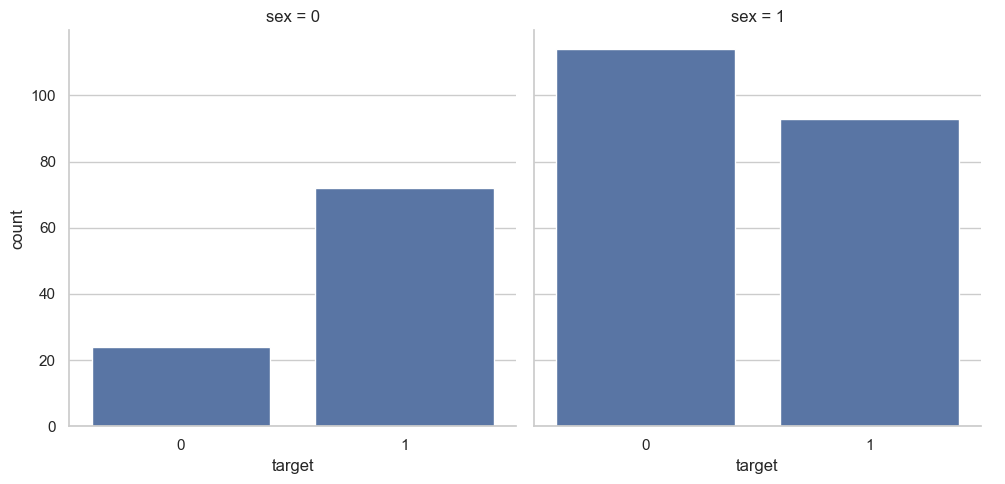

In [20]:
ax = sns.catplot(x ='target', col="sex", data=df,kind="count", height=5, aspect=1)

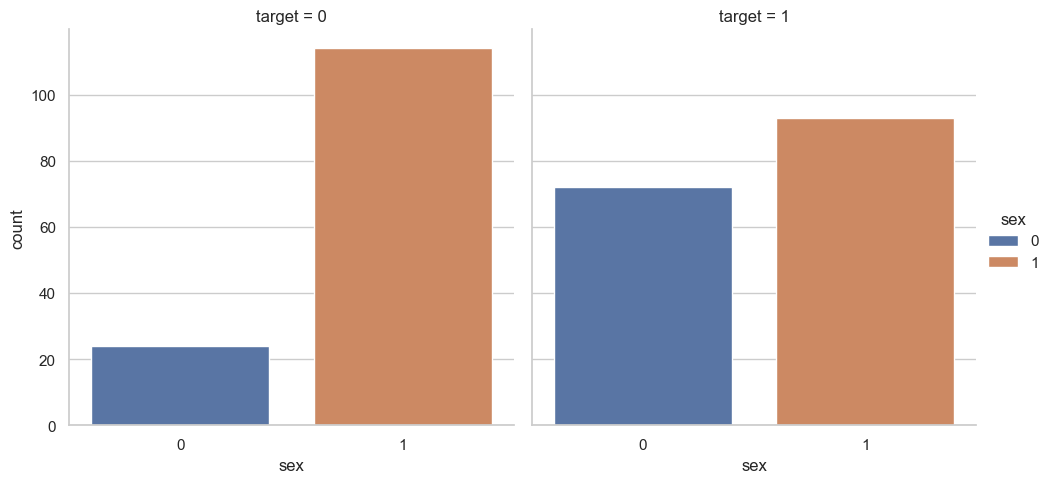

In [21]:
ax = sns.catplot(x ='sex',hue ="sex", col="target", data=df, kind="count", height=5, aspect=1)

#### Comment


- The above plot segregate the values of `target` variable and plot on two different columns labelled as (sex = 0, sex = 1).

- I think it is more convinient way of interpret the plots.

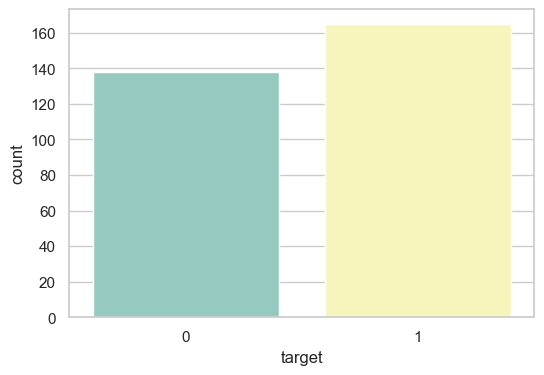

In [22]:
f, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x="target", data=df, palette="Set3")
plt.show()

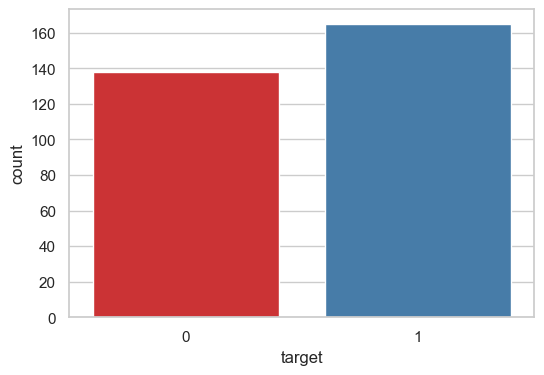

In [23]:
f, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x="target", data=df, palette="Set1")
plt.show()

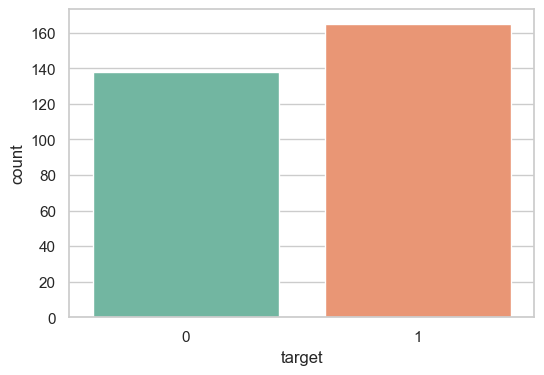

In [24]:
f, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x="target", data=df, palette="Set2")
plt.show()

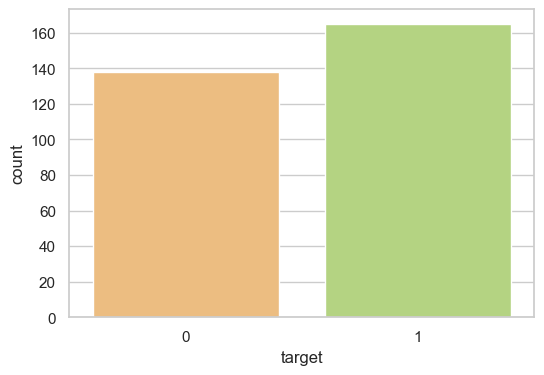

In [25]:
f, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x="target", data=df, palette="RdYlGn")
plt.show()

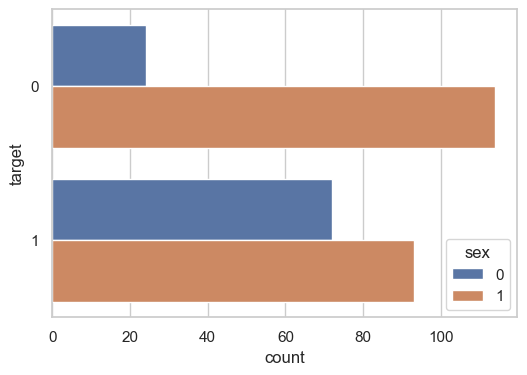

In [26]:
f, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(y="target", hue="sex", data=df)
plt.show()

#### Comment


- I have visualize the `target` values distribution wrt `sex`. 

- We can follow the same principles and visualize the `target` values distribution wrt `fbs (fasting blood sugar)` and `exang (exercise induced angina)`.

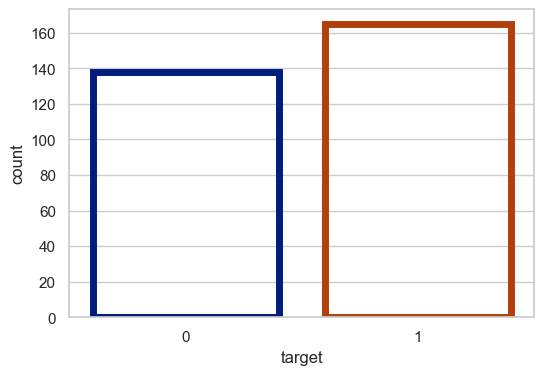

In [27]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="target", data=df, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 6))
plt.show()

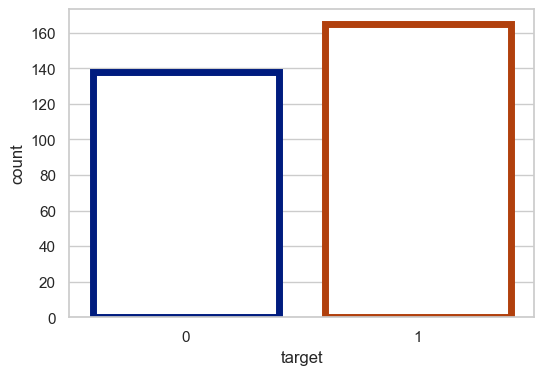

In [28]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="target", data=df, facecolor=(1,1,1), linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.show()

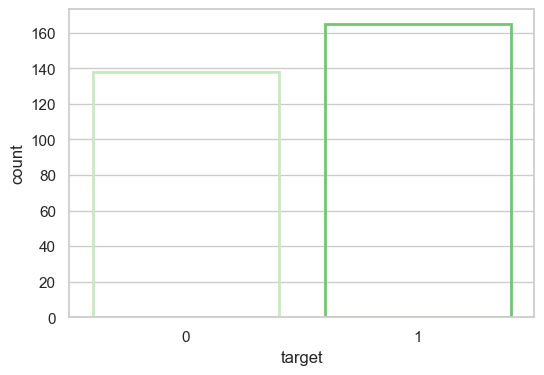

In [29]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="target", data=df, facecolor=(0, 1, 0, 0), linewidth=2, edgecolor=sns.color_palette('Greens', 3))
plt.show()

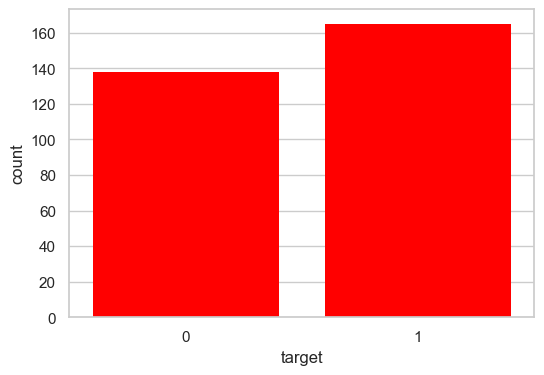

In [30]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="target", data=df, facecolor=(1, 0, 0, 1), linewidth=2, edgecolor=sns.color_palette("dark", 0))
plt.show()

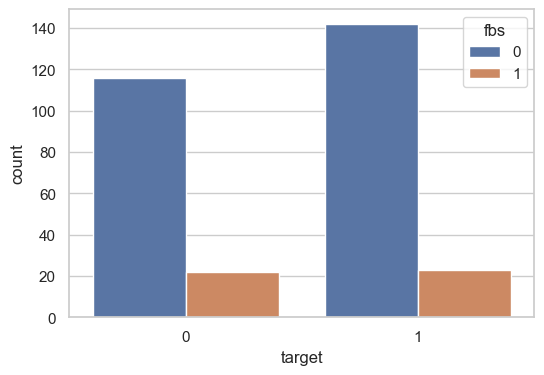

In [31]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="target", hue="fbs", data=df)
plt.show()

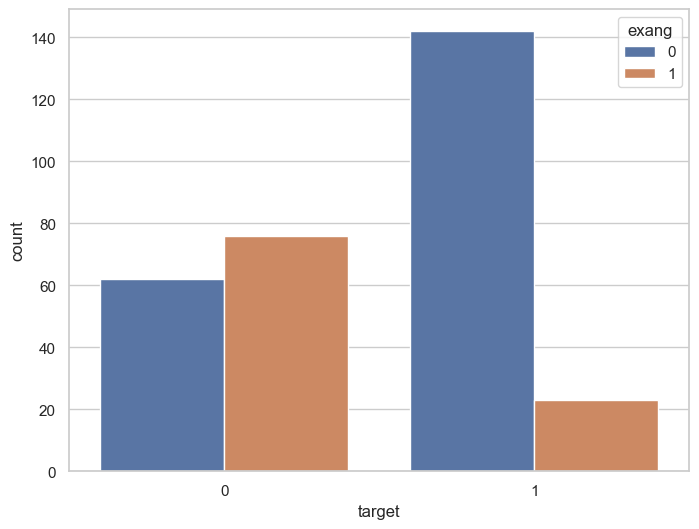

In [32]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exang", data=df)
plt.show()

### Findings of Univariate Analysis <a class="anchor" id="7.2"></a>

Findings of univariate analysis are as follows:-

-	Our feature variable of interest is `target`.

-   It refers to the presence of heart disease in the patient.

-   It is integer valued as it contains two integers 0 and 1 - (0 stands for absence of heart disease and 1 for presence of heart disease).

- `1` stands for presence of heart disease. So, there are 165 patients suffering from heart disease.

- Similarly, `0` stands for absence of heart disease. So, there are 138 patients who do not have any heart disease.

- There are 165 patients suffering from heart disease, and 
   
- There are 138 patients who do not have any heart disease.

- Out of 96 females - 72 have heart disease and 24 do not have heart disease.

- Similarly, out of 207 males - 93 have heart disease and 114 do not have heart disease.

###  Bivariate Analysis

#### Estimate correlation coefficients <a class="anchor" id="8.1"></a>

Our dataset is very small. So, I will compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. I will compute it using the `df.corr()` method as follows:-

In [33]:
correlation = df.corr()

The target variable is `target`. So, we should check how each attribute correlates with the `target` variable. We can do it as follows:-

In [34]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

#### Interpretation of correlation coefficient

- The correlation coefficient ranges from -1 to +1. 

- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with `target` variable.

- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with `target` variable.

- When it is close to 0, it means that there is no correlation. So, there is no correlation between `target` and `fbs`.

- We can see that the `cp` and `thalach` variables are mildly positively correlated with `target` variable. So, I will analyze the interaction between these features and `target` variable.


### Analysis of `target` and `cp` variable

#### Explore `cp` variable


- `cp` stands for chest pain type.

- First, I will check number of unique values in `cp` variable.

In [35]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [36]:
df['cp'].nunique()

4

So, there are 4 unique values in `cp` variable. Hence, it is a categorical variable.

In [37]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

#### Comment

- It can be seen that `cp` is a categorical variable and it contains 4 types of values - 0, 1, 2 and 3.

#### Visualize the frequency distribution of `cp` variable

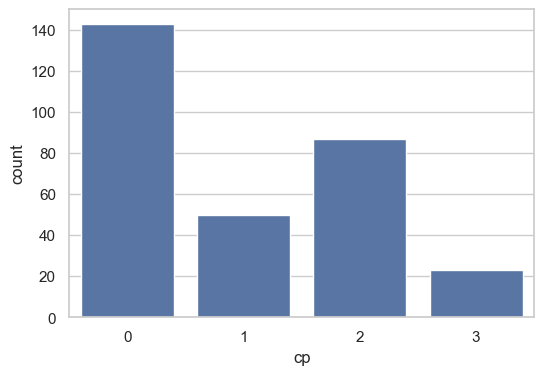

In [38]:
f, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(x="cp", data=df)
plt.show()

#### Frequency distribution of `target` variable wrt `cp`

In [39]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

#### Comment


- `cp` variable contains four integer values 0, 1, 2 and 3.

- `target` variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- So, the above analysis gives `target` variable values categorized into presence and absence of heart disease and groupby `cp` variable values.

- We can visualize this information below.

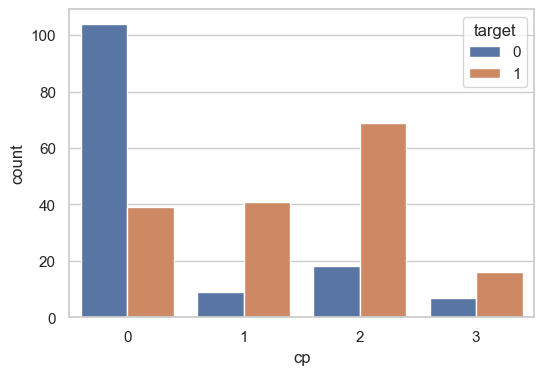

In [40]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="cp", hue="target", data=df)
plt.show()

#### Interpretation

- We can see that the values of `target` variable are plotted wrt `cp`.

- `target` variable contains two integer values 1 and 0 : (1 = Presence of heart disease; 0 = Absence of heart disease)

- The above plot confirms our above findings, 

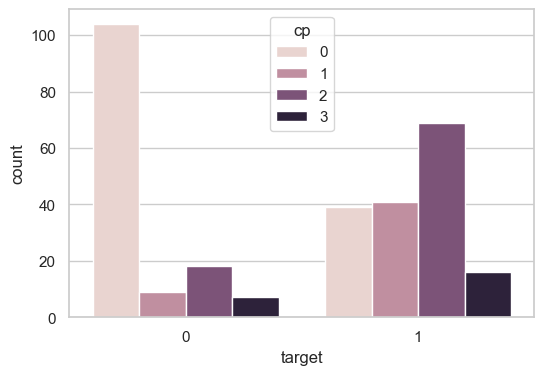

In [41]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="target", hue="cp", data=df)
plt.show()

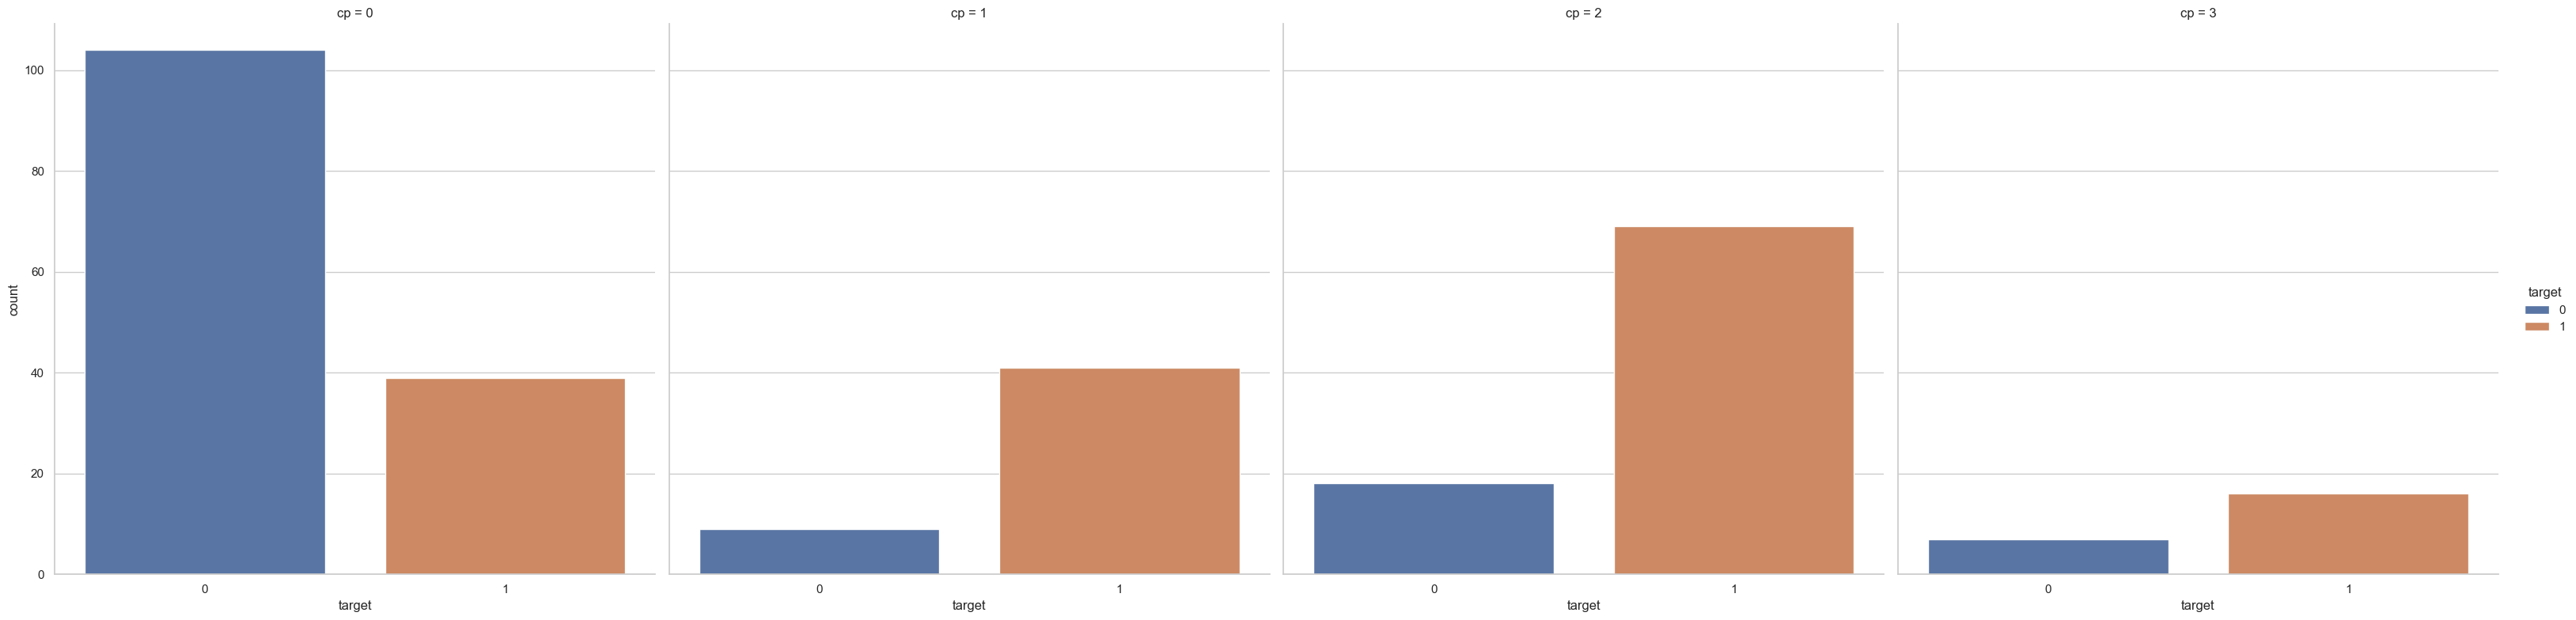

In [42]:
ax = sns.catplot(x="target",hue='target', col="cp", data=df, kind="count", height=8, aspect=1)

### Analysis of `target` and `thalach` variable <a class="anchor" id="8.3"></a>


#### Explore `thalach` variable


- `thalach` stands for maximum heart rate achieved.

- I will check number of unique values in `thalach` variable as follows :

In [43]:
df['thalach'].nunique()

91

In [44]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

#### Visualize the frequency distribution of `thalach` variable

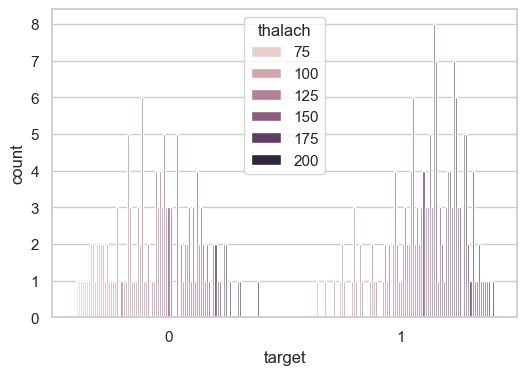

In [45]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="target", hue="thalach", data=df)
plt.show()

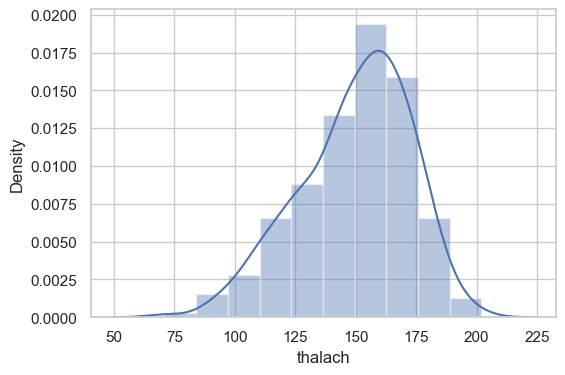

In [46]:
f,ax = plt.subplots(figsize=(6,4))
x = df['thalach']
ax = sns.distplot(x,bins=10)
plt.show()

#### Comment

- We can see that the `thalach` variable is slightly negatively skewed.
- Positive Skew (Right Skew): The right tail (higher values) is longer or fatter than the left tail. The bulk of the data values are concentrated on the left of the mean, and the mean is greater than the median.
- Negative Skew (Left Skew): The left tail (lower values) is longer or fatter than the right tail. The bulk of the data values are concentrated on the right of the mean, and the mean is less than the median.


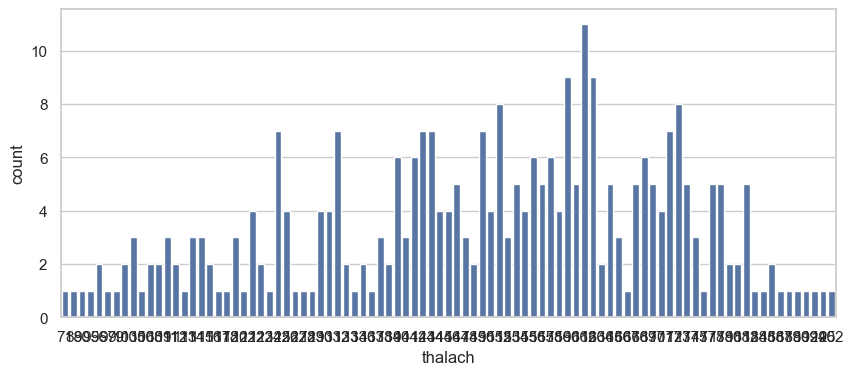

In [47]:
f,ax = plt.subplots(figsize=(10,4))
ax = sns.countplot(x="thalach",data = df)
plt.show()

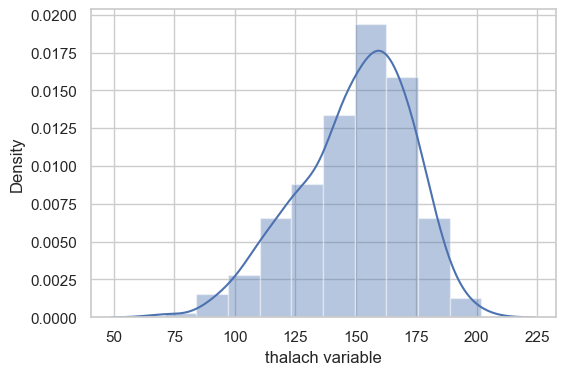

In [48]:
f, ax = plt.subplots(figsize=(6,4))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.distplot(x, bins=10)
plt.show()

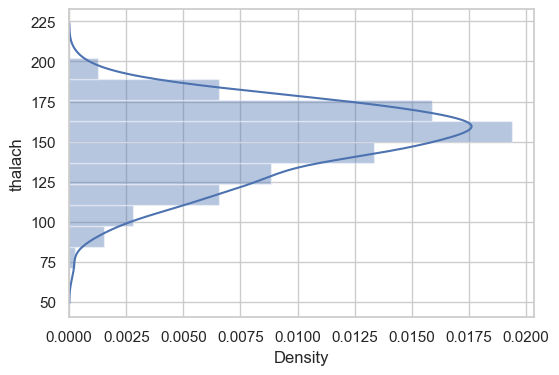

In [49]:
f, ax = plt.subplots(figsize=(6,4))
x = df['thalach']
ax = sns.distplot(x, bins=10, vertical=True)
plt.show()

#### Seaborn Kernel Density Estimation (KDE) Plot


- The kernel density estimate (KDE) plot is a useful tool for plotting the shape of a distribution.

- The KDE plot plots the density of observations on one axis with height along the other axis.

- We can plot a KDE plot as follows :

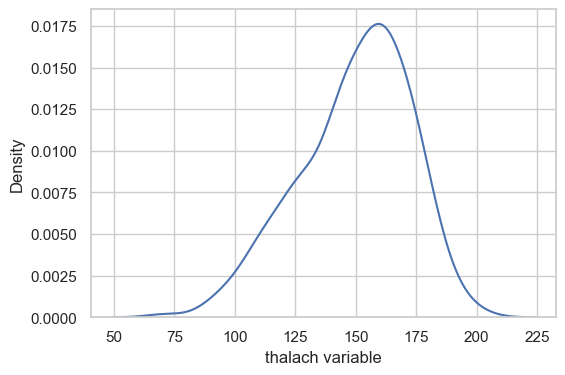

In [50]:
f, ax = plt.subplots(figsize=(6,4))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x)
plt.show()

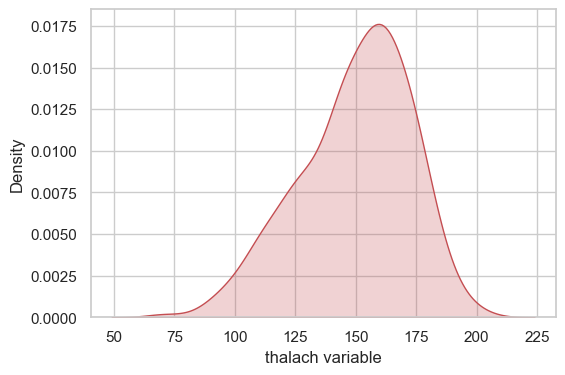

In [51]:
f, ax = plt.subplots(figsize=(6,4))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

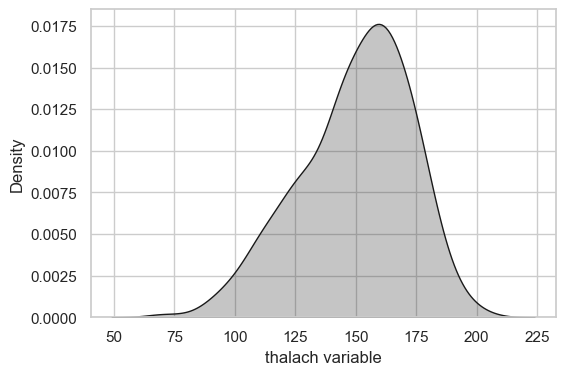

In [52]:
f, ax = plt.subplots(figsize=(6,4))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x, shade=True, color='k')
plt.show()

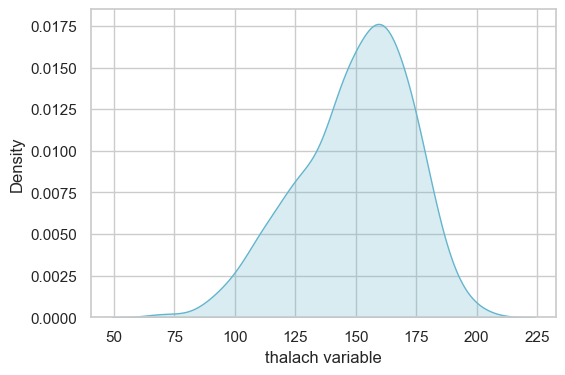

In [53]:
f, ax = plt.subplots(figsize=(6,4))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x, shade=True, color='c')
plt.show()

#### Histogram

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

- We can plot a histogram as follows :

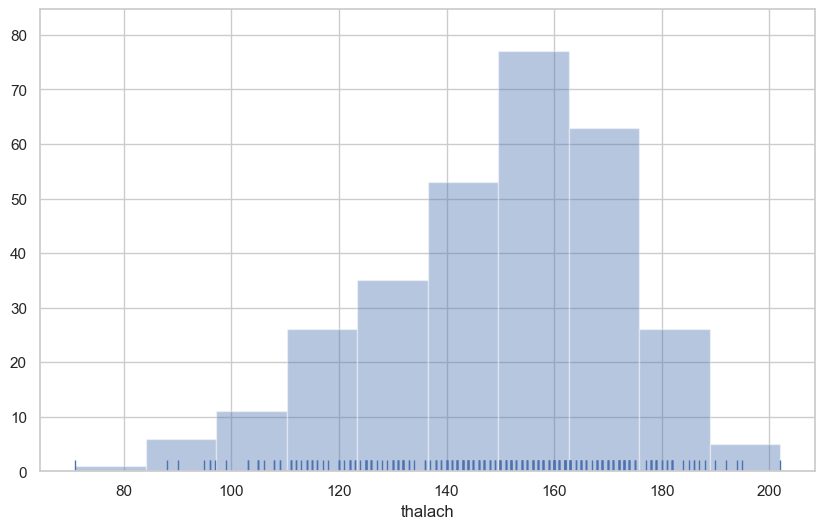

In [54]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

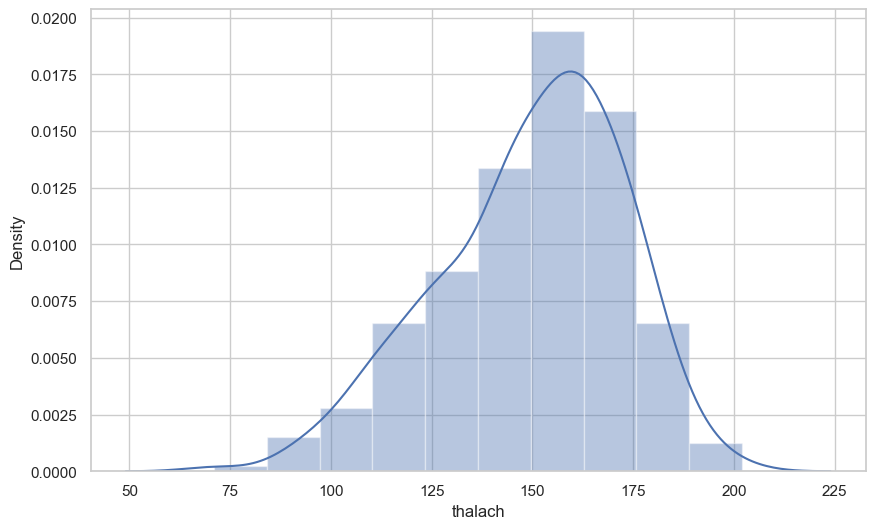

In [55]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, kde=True, rug=False, bins=10)
plt.show()

#### Visualize frequency distribution of `thalach` variable wrt `target`

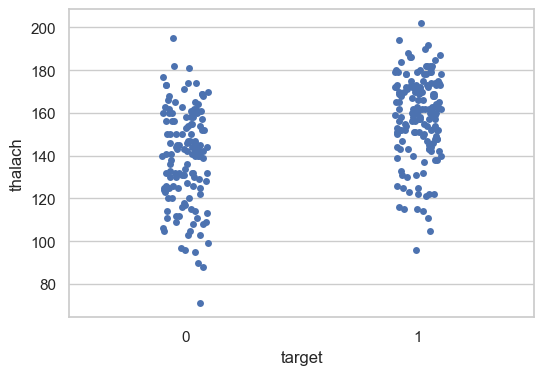

In [56]:
f, ax = plt.subplots(figsize=(6, 4))
sns.stripplot(x="target", y="thalach", data=df)
plt.show()

#### Interpretation

- We can see that those people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

We can add jitter to bring out the distribution of values as follows :

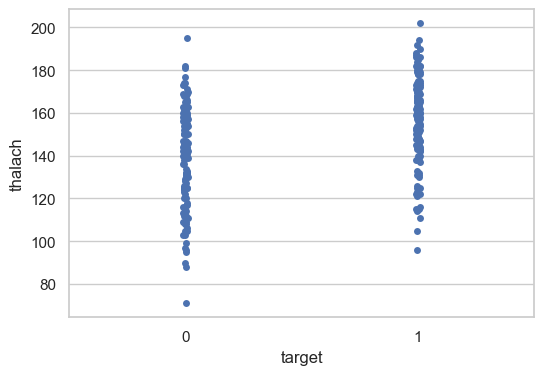

In [57]:
f, ax = plt.subplots(figsize=(6,4))
sns.stripplot(x="target", y="thalach", data=df, jitter = 0.01)
plt.show()

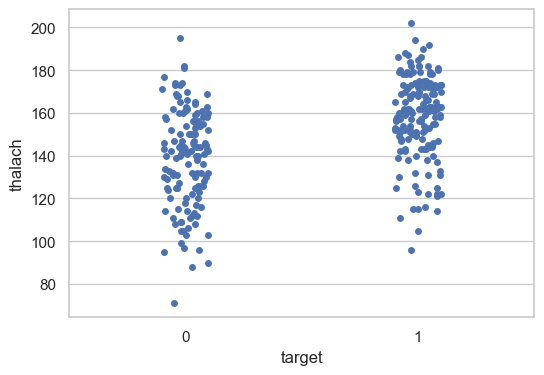

In [58]:
f, ax = plt.subplots(figsize=(6,4))
sns.stripplot(x="target", y="thalach", data=df, jitter = 0.1)
plt.show()

#### Visualize distribution of `thalach` variable wrt `target` with boxplot

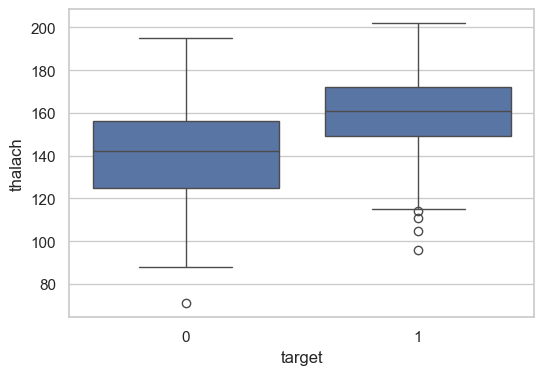

In [59]:
f, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x="target", y="thalach", data=df)
plt.show()

#### Interpretation

The above boxplot confirms our finding that people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

### Findings of Bivariate Analysis <a class="anchor" id="8.4"></a>

Findings of Bivariate Analysis are as follows –


- There is no variable which has strong positive correlation with `target` variable.

- There is no variable which has strong negative correlation with `target` variable.

- There is no correlation between `target` and `fbs`.

- The `cp` and `thalach` variables are mildly positively correlated with `target` variable. 

- We can see that the `thalach` variable is slightly negatively skewed.

- The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).

- The people suffering from heart disease (target = 1) have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease (target = 0).


## Multivariate analysis <a class="anchor" id="9"></a>
- The objective of the multivariate analysis is to discover patterns and relationships in the dataset.

### Discover patterns and relationships

- An important step in EDA is to discover patterns and relationships between variables in the dataset. 

- I will use `heat map` and `pair plot` to discover the patterns and relationships in the dataset.

- First of all, I will draw a `heat map`.

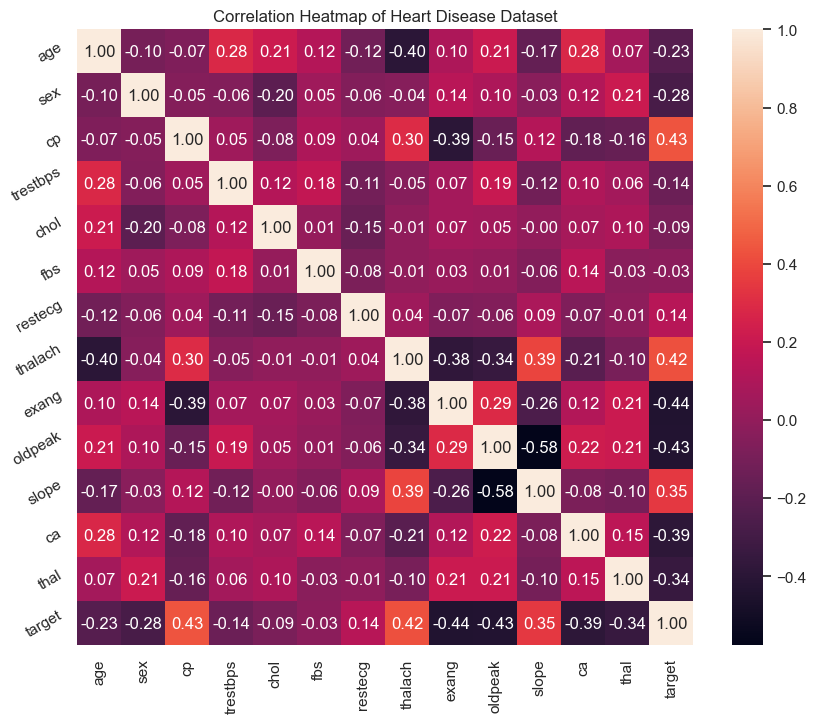

In [60]:
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

#### Interpretation

From the above correlation heat map, we can conclude that :-

- `target` and `cp` variable are mildly positively correlated (correlation coefficient = 0.43).

- `target` and `thalach` variable are also mildly positively correlated (correlation coefficient = 0.42).

- `target` and `slope` variable are weakly positively correlated (correlation coefficient = 0.35).

- `target` and `exang` variable are mildly negatively correlated (correlation coefficient = -0.44).

- `target` and `oldpeak` variable are also mildly negatively correlated (correlation coefficient = -0.43).

- `target` and `ca` variable are weakly negatively correlated (correlation coefficient = -0.39).

- `target` and `thal` variable are also waekly negatively correlated (correlation coefficient = -0.34).

### Pair Plot <a class="anchor" id="9.2"></a>

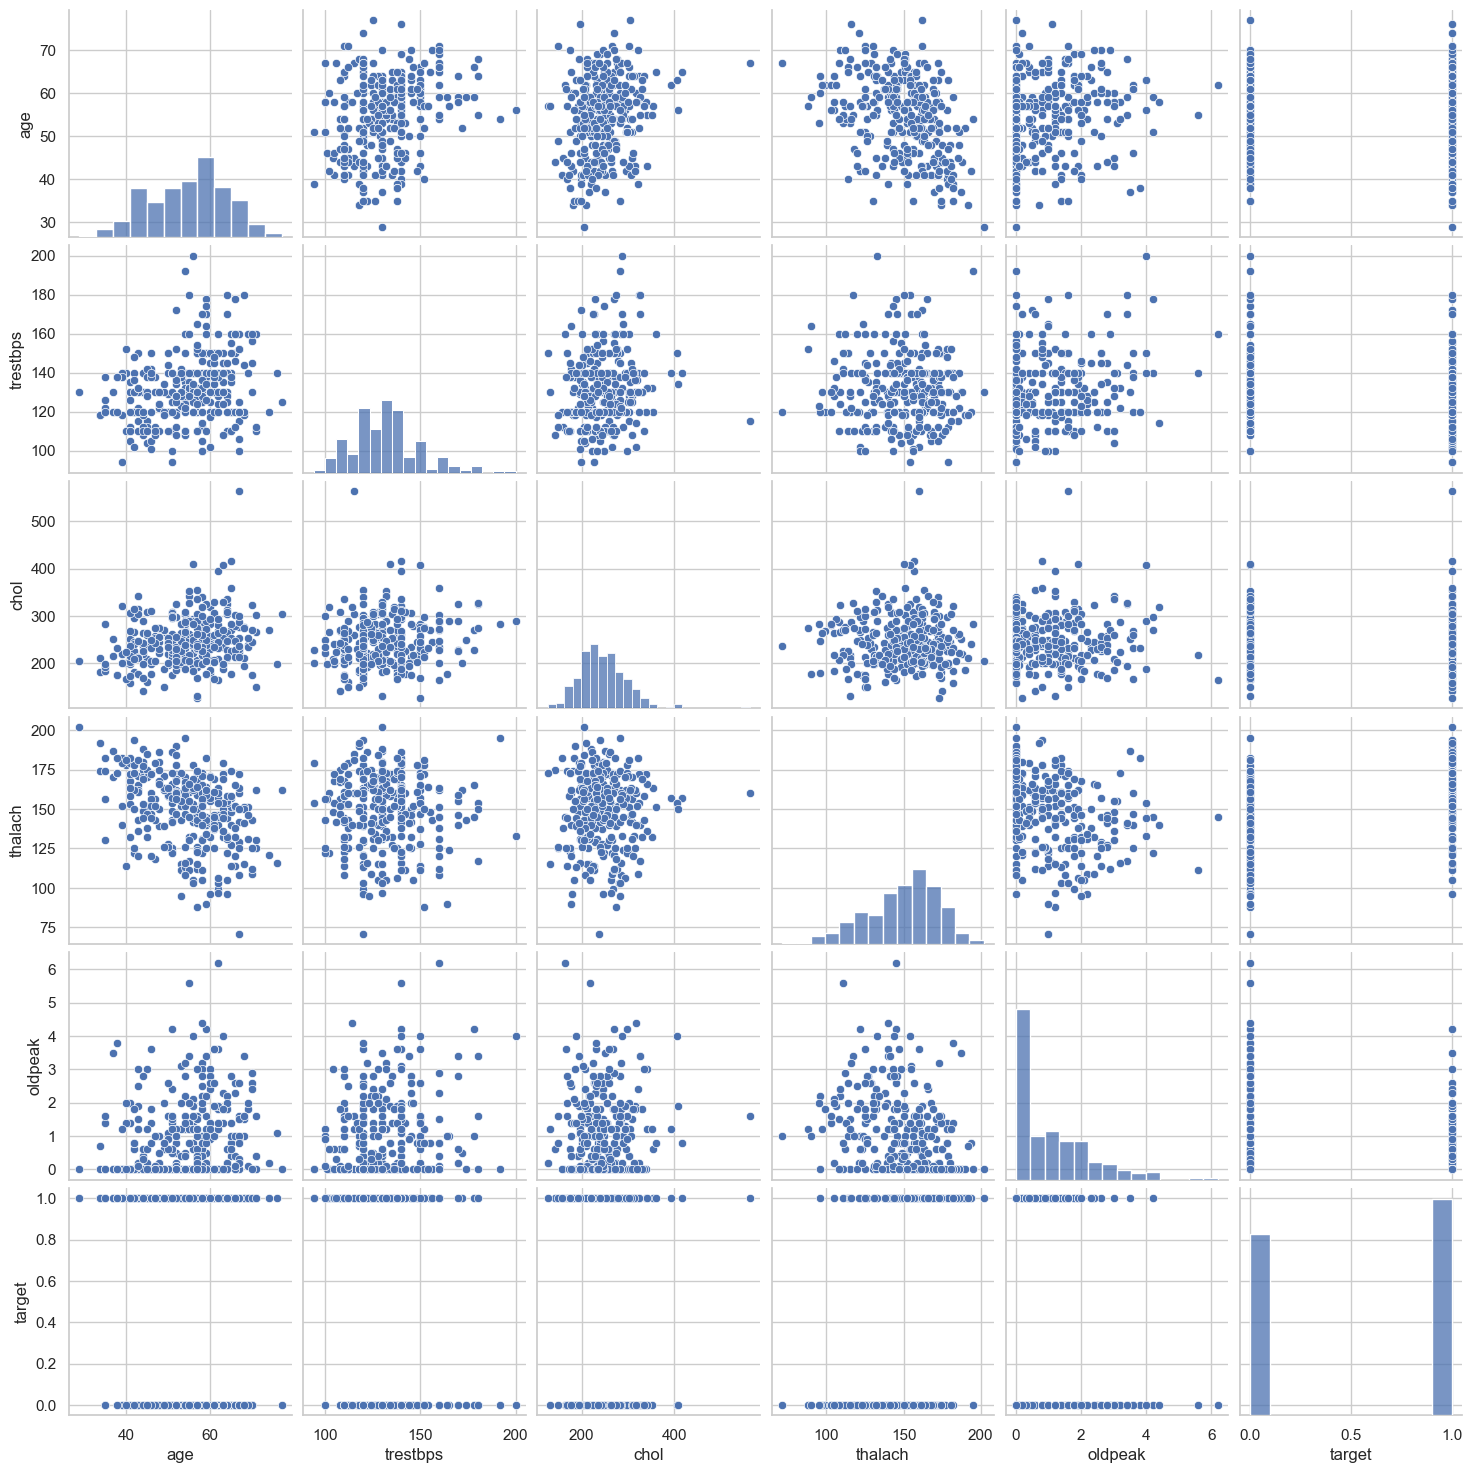

In [61]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()


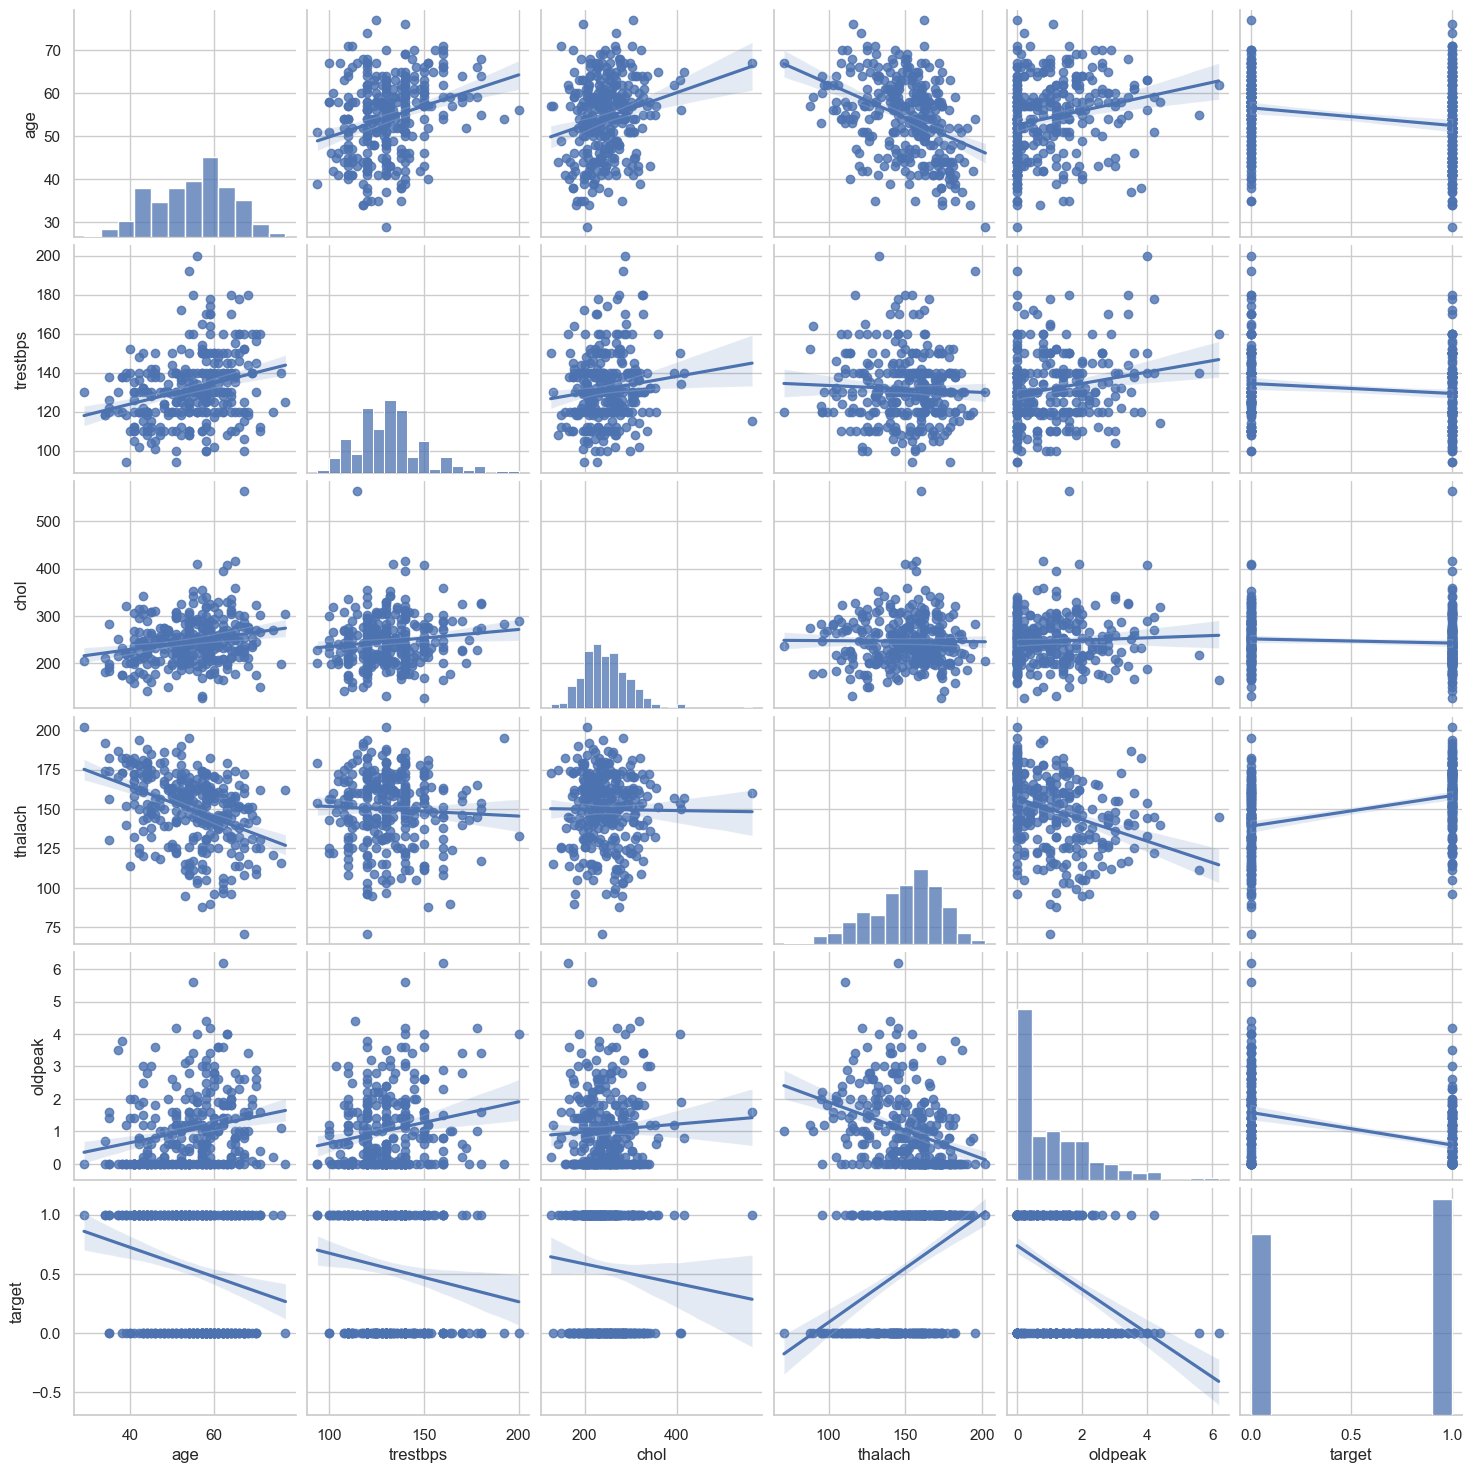

In [62]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(df[num_var], kind='reg', diag_kind='hist')
plt.show()

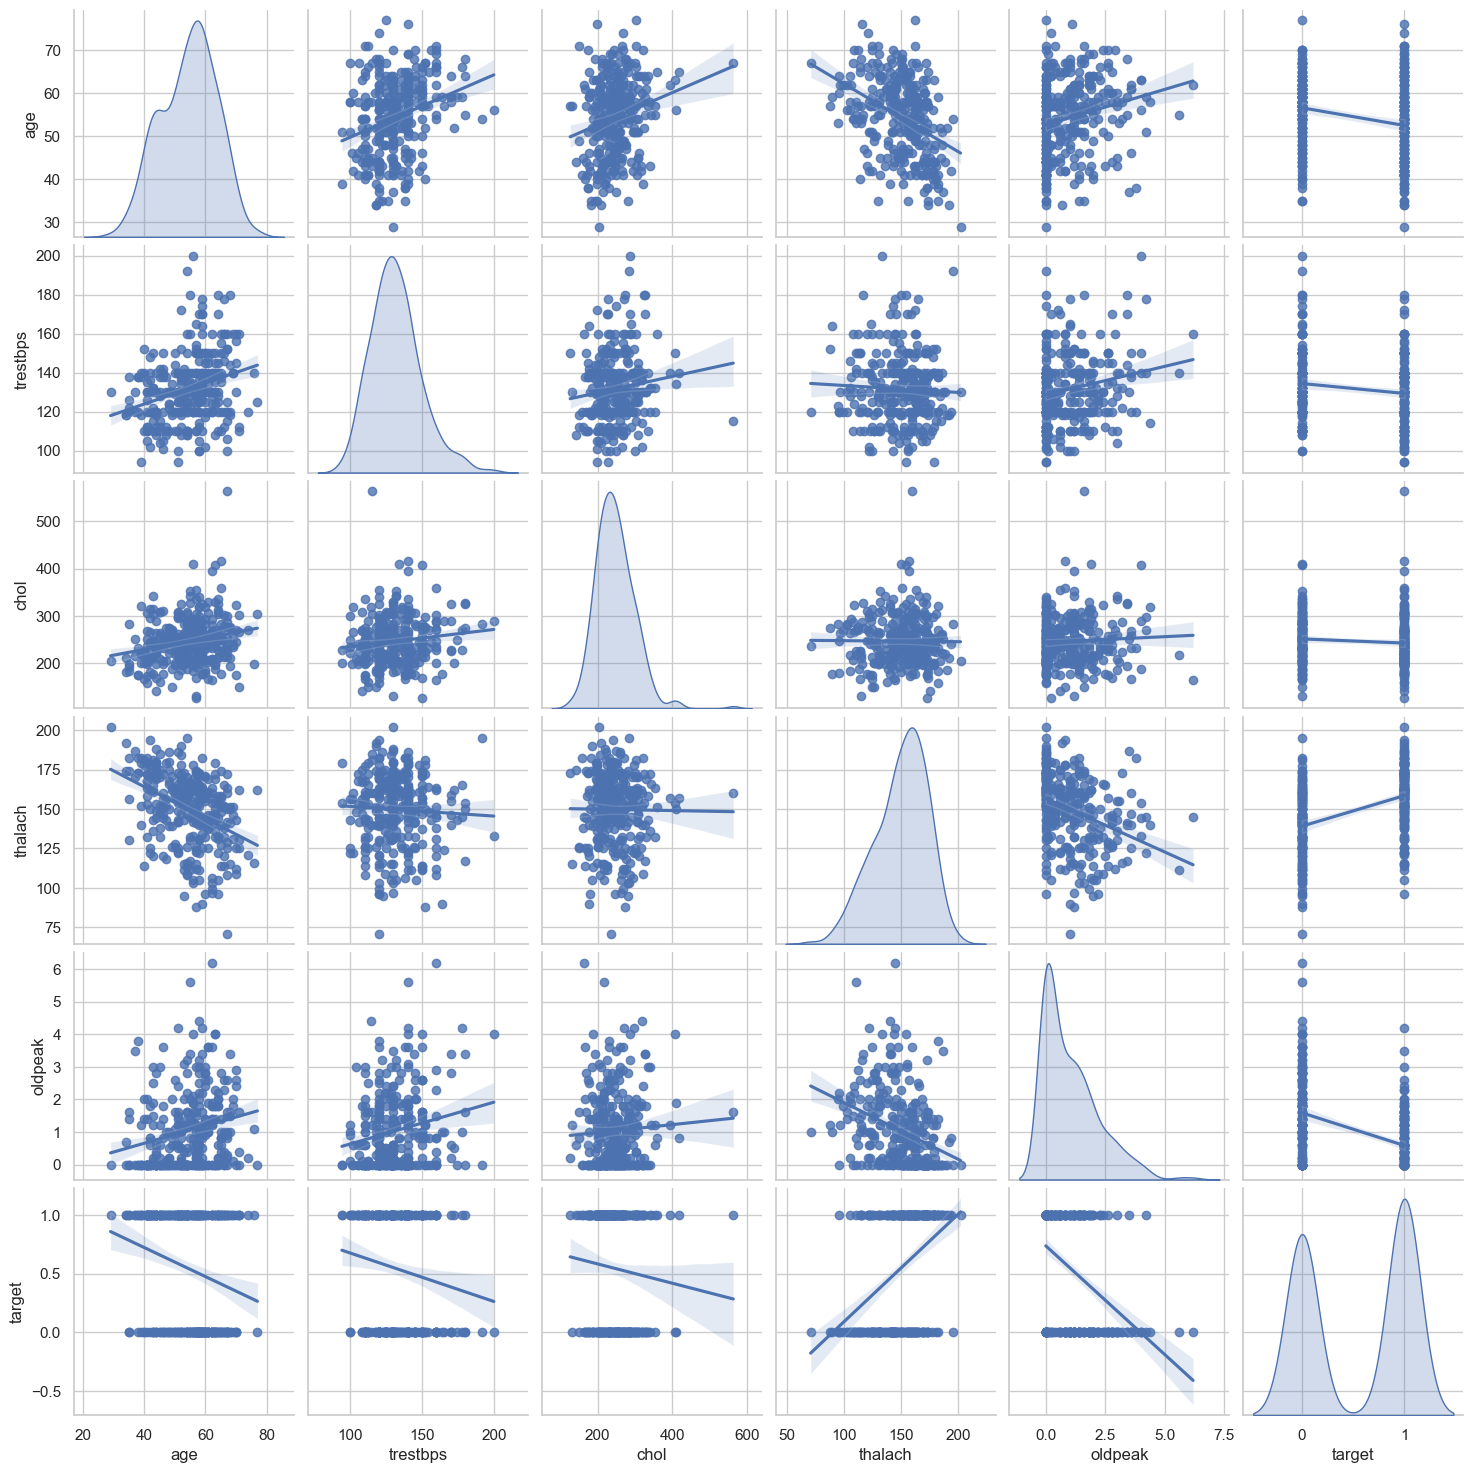

In [63]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(df[num_var], kind='reg', diag_kind='kde')
plt.show()

#### Comment


- I have defined a variable `num_var`. Here `age`, `trestbps`, ``chol`, `thalach` and `oldpeak`` are numerical variables and `target` is the categorical variable.

- So, I wll check relationships between these variables.

### Analysis of `age` and other variables

##### Check the number of unique values in `age` variable

In [64]:
df['age'].nunique()

41

In [65]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

#### Interpretation

- The mean value of the `age` variable is 54.37 years.

- The minimum and maximum values of `age` are 29 and 77 years.

#### Plot the distribution of `age` variable


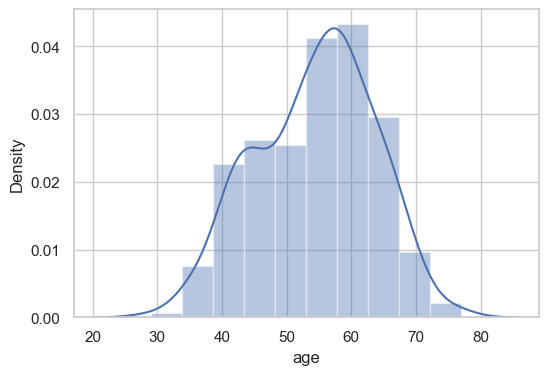

In [66]:
f, ax = plt.subplots(figsize=(6,4))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

#### Interpretation

- The `age` variable distribution is approximately normal.

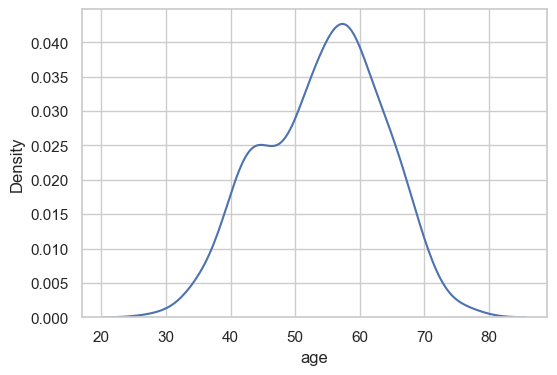

In [67]:
f, ax = plt.subplots(figsize=(6,4))
x = df['age']
ax = sns.kdeplot(data= df,x='age')
plt.show()

### Analyze `age` and `target` variable

#### Visualize frequency distribution of `age` variable wrt `target`

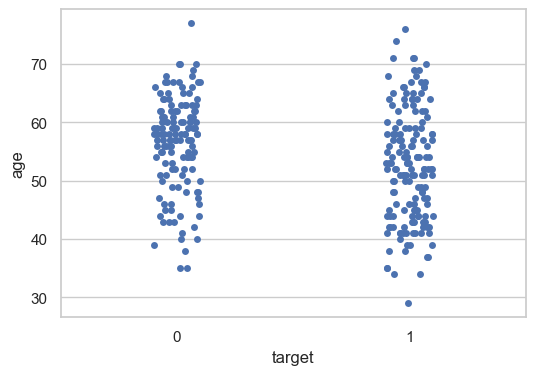

In [68]:
f, ax = plt.subplots(figsize=(6, 4))
sns.stripplot(x="target", y="age", data=df)
plt.show()

#### Interpretation

- We can see that the people suffering from heart disease (target = 1) and people who are not suffering from heart disease (target = 0) have comparable ages.

#### Visualize distribution of `age` variable wrt `target` with boxplot

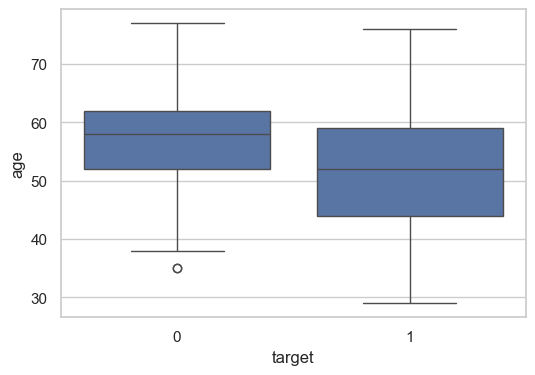

In [69]:
f, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(x="target", y="age", data=df)
plt.show()

#### Interpretation

- The above boxplot tells two different things :

  - The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.
  
  - The dispersion or spread of age of the people who have heart disease is greater than the dispersion or spread of age of the people who do not have heart disease.


### Analyze `age` and `trestbps` variable
- I will plot a scatterplot to visualize the relationship between age and trestbps variable.

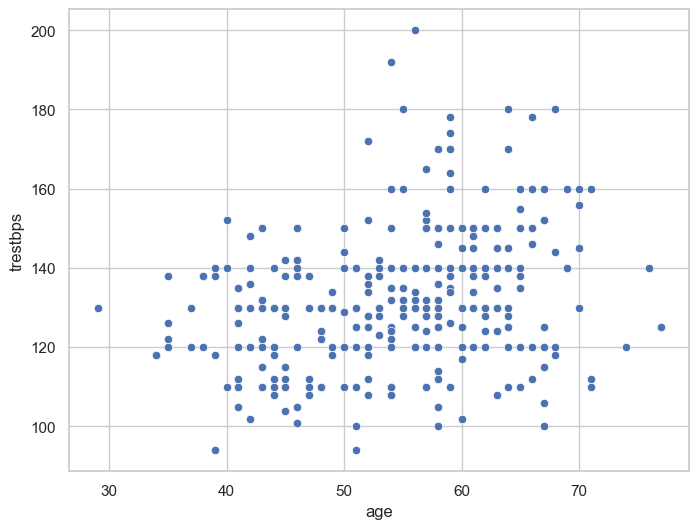

In [70]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="trestbps", data=df)
plt.show()


#### Interpretation

- The above scatter plot shows that there is no correlation between `age` and `trestbps` variable.

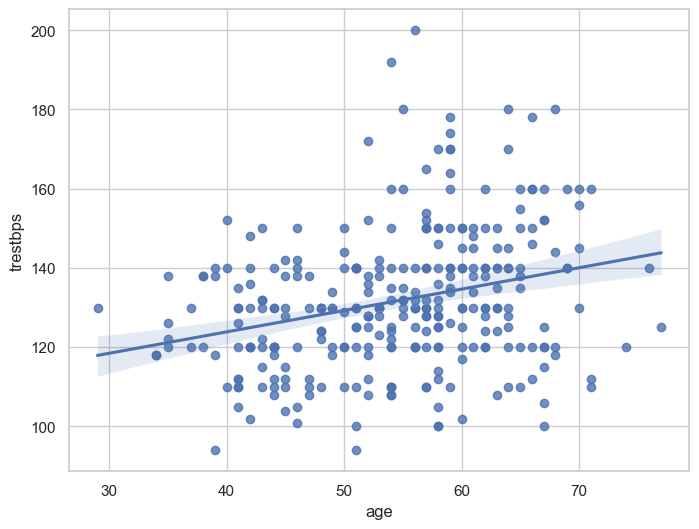

In [71]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=df)
plt.show()

#### Interpretation

- The above line shows that linear regression model is not good fit to the data.

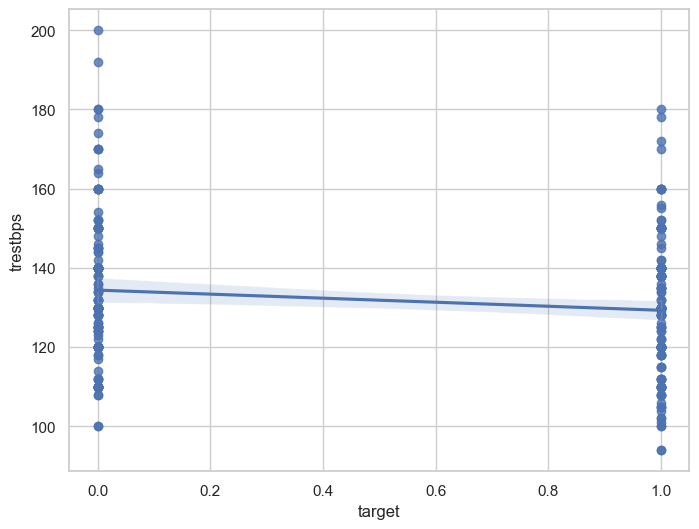

In [72]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="target", y="trestbps", data=df)
plt.show()

### Analyze `age` and `chol` variable

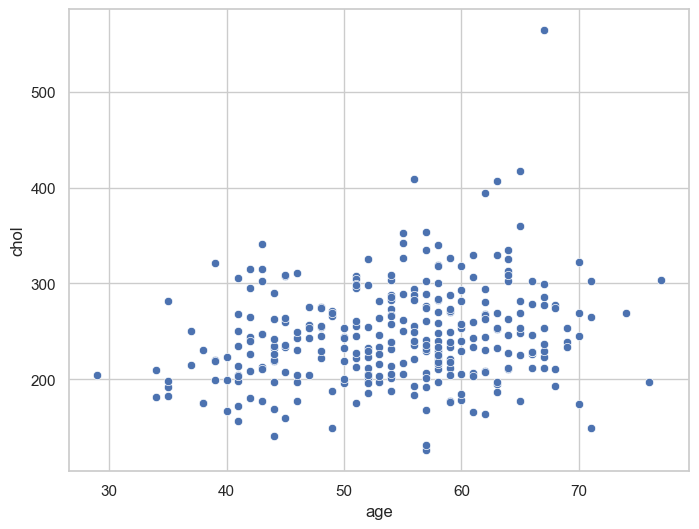

In [73]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="chol", data=df)
plt.show()

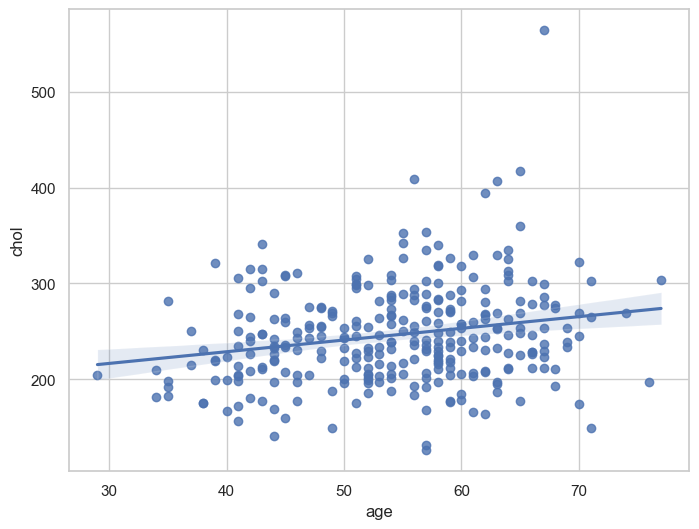

In [74]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=df)
plt.show()

#### Interpretation

- The above plot confirms that there is a slighly positive correlation between `age` and `chol` variables. Because the linearity is somewhat increasing

### Analyze `chol` and `thalach` variable

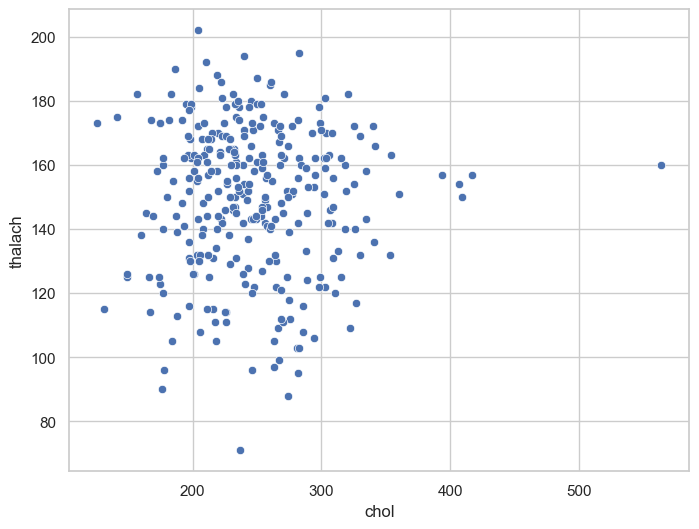

In [75]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="chol", y = "thalach", data=df)
plt.show()

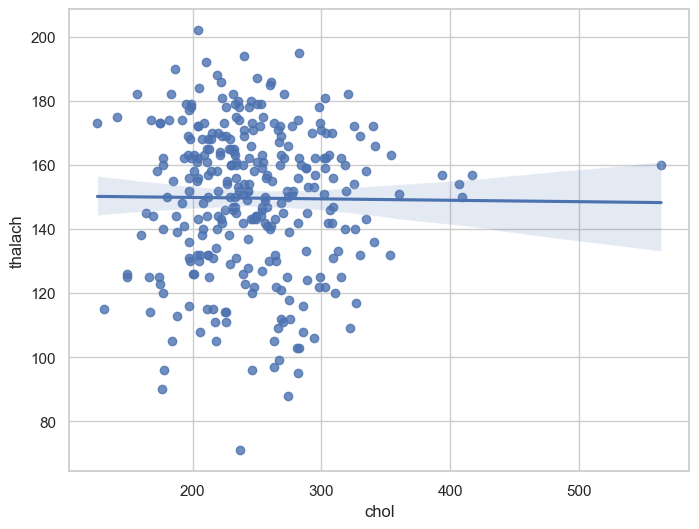

In [76]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=df)
plt.show()

#### Interpretation


- The above plot shows that there is no correlation between `chol` and `thalach` variable.

## Dealing with missing values 

### Useful commands to detect missing values <a class="anchor" id="10.2"></a>

-	**df.isnull()**

The above command checks whether each cell in a dataframe contains missing values or not. If the cell contains missing value, it returns True otherwise it returns False.


-	**df.isnull().sum()**

The above command returns total number of missing values in each column in the dataframe.


-	**df.isnull().sum().sum()** 

It returns total number of missing values in the dataframe.


-	**df.isnull().mean()**

It returns percentage of missing values in each column in the dataframe.


-	**df.isnull().any()**

It checks which column has null values and which has not. The columns which has null values returns TRUE and FALSE otherwise.

-	**df.isnull().any().any()**

It returns a boolean value indicating whether the dataframe has missing values or not. If dataframe contains missing values it returns TRUE and FALSE otherwise.


-	**df.isnull().values.any()**

It checks whether a particular column has missing values or not. If the column contains missing values, then it returns TRUE otherwise FALSE.


-	**df.isnull().values.sum()**


It returns the total number of missing values in the dataframe.

In [77]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [78]:
df.isnull().values.sum()

0

## Check with ASSERT statement <a class="anchor" id="11"></a>


- We must confirm that our dataset has no missing values. 

- We can write an **assert statement** to verify this. 

- We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present. 

- This gives us confidence that our code is running properly.

- **Assert statement** will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

- **Asserts**

  - assert 1 == 1 (return Nothing if the value is True)

  - assert 1 == 2 (return AssertionError if the value is False)

In [79]:
assert pd.notnull(df).all().all()

In [80]:
assert (df >= 0).all().all()

#### Interpretation

- The above two commands do not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset. 

- All the values are greater than or equal to zero.

## Outlier detection <a class="anchor" id="12"></a>


I will make boxplots to visualise outliers in the continuous numerical variables : -

`age`, `trestbps`, `chol`, `thalach` and  `oldpeak` variables.


### `age` variable

In [81]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

### Box-plot of age variable

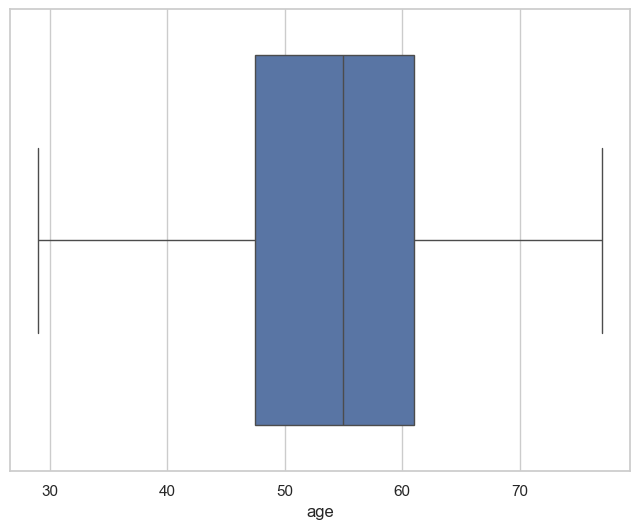

In [82]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["age"])
plt.show()

### `trestbps` variable

In [83]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

#### Box-plot of trestbps variable

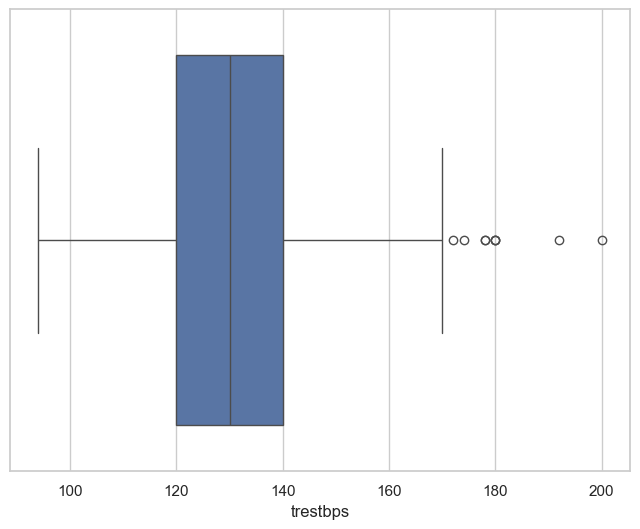

In [84]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["trestbps"])
plt.show()


### `chol` variable

In [85]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

#### Box-plot of `chol` variable

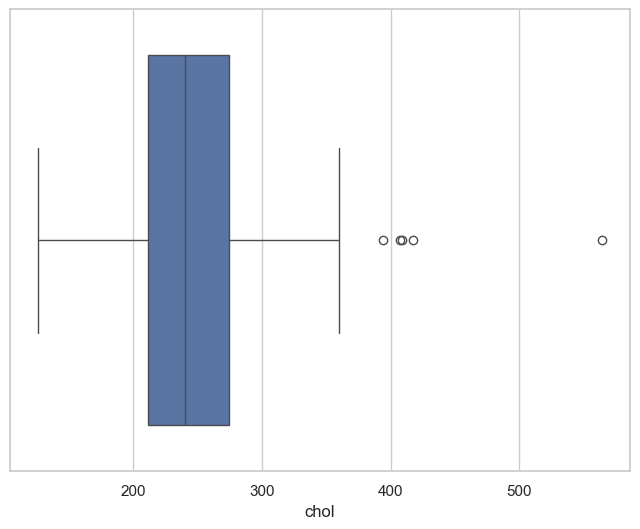

In [86]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["chol"])
plt.show()

### `thalach` variable

In [87]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

#### Box-plot of `thalach` variable

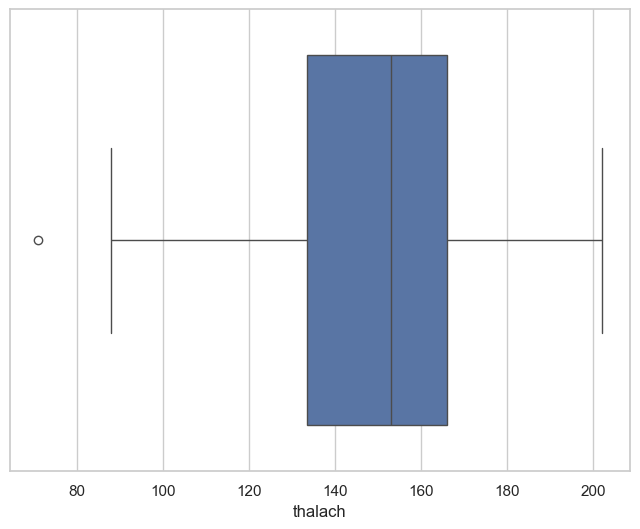

In [88]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["thalach"])
plt.show()

### `oldpeak` variable

In [89]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

#### Box-plot of `oldpeak` variable

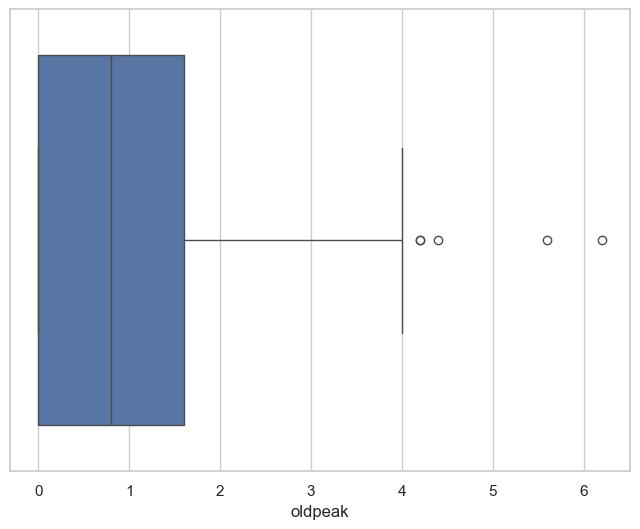

In [90]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["oldpeak"])
plt.show()


#### Findings

- The `age` variable does not contain any outlier.

- `trestbps` variable contains outliers to the right side.

- `chol` variable also contains outliers to the right side.

- `thalach` variable contains a single outlier to the left side.

- `oldpeak` variable contains outliers to the right side.

- Those variables containing outliers needs further investigation.


## Conclusion

In this kernel, we have explored the heart disease dataset. In this kernel, we have implemented many of the strategies presented in the book **Think Stats - Exploratory Data Analysis in Python by Allen B Downey** . The feature variable of interest is `target` variable. We have analyzed it alone and check its interaction with other variables. We have also discussed how to detect missing data and outliers.